In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
     

In [3]:
df=pd.DataFrame()

In [4]:
df['X']=X.reshape(100)
df['y']=y

In [5]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

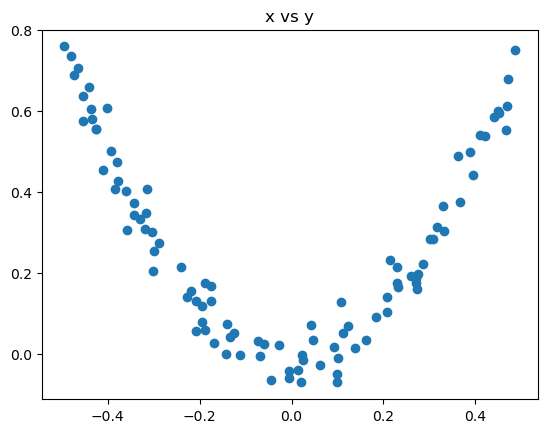

In [6]:
plt.scatter(df['X'],df['y'])
plt.title('x vs y')

In [8]:
df['pred1']=df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [10]:
df['res1']=df['y']-df['pred1']
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


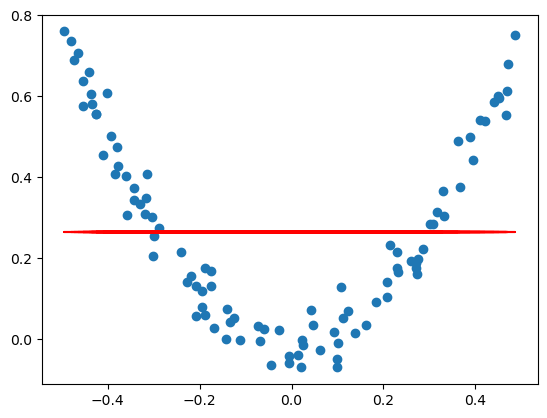

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [22]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

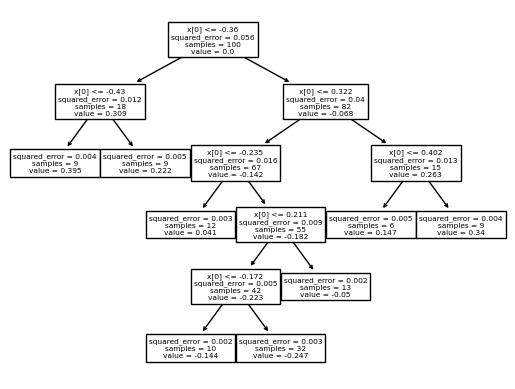

In [23]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [26]:
X_test=np.linspace(-0.5,0.5,500)

In [27]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))


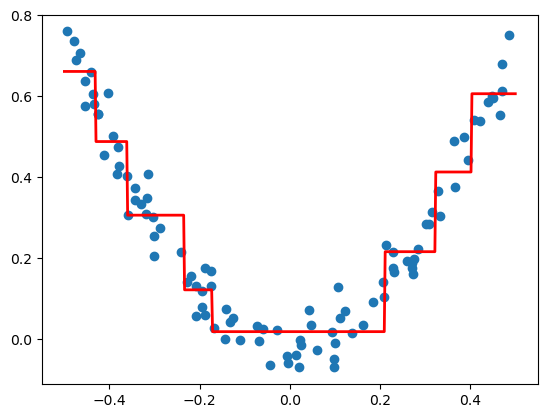

In [29]:
plt.scatter(df['X'],df['y'])
plt.plot(X_test, y_pred, linewidth=2,color='red')


In [30]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))


In [32]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912
